In [1]:
import numpy as np

from math import pow

# Mean Squared Error
$$
\begin{equation}
    \begin{split}
        E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N}(w^Tx_n - y_n)^2 \\
        = \frac{1}{N} || Xw - y ||^2
    \end{split}
\end{equation}
$$

In [3]:
def mean_squared_error(X: np.ndarray, y: np.ndarray, w: np.ndarray):
    return np.mean((X * w - y) ** 2)

### EXAMPLE 1

In [5]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0])
w = np.array([1.5])

mean_squared_error(X, y, w)

0.0

### EXAMPLE 2

In [7]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0])
w = np.array([1.8])

mean_squared_error(X, y, w)

1.5399999999999998

# Pseudo-Inverse

$$
\begin{equation}
    \begin{split}
         \nabla E_{in}(w) = \frac{2}{N} X^T(Xw - y) = 0 \\
        & \Rightarrow X^TXw = X^Ty \\
        & \Rightarrow w = (X^TX)^{-1}X^T \\ 
        \\
        w = X^{\dagger}y
    \end{split}
\end{equation}
$$

In [10]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [11]:
X, y = make_regression(n_samples = 200, n_features = 1, noise = 50, random_state=42)

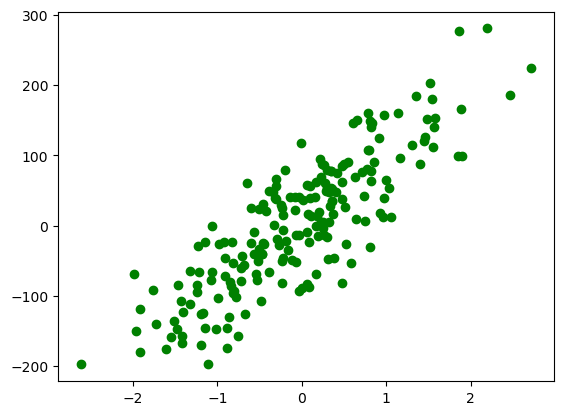

In [12]:
plt.plot(X, y, 'go')

In [13]:
X_artificial_coordinate = np.concatenate(
    (
        np.ones((X.shape[0], 1)),
        X
    ),
    axis = 1
)
X_artificial_coordinate[:10]

array([[ 1.        ,  1.85227818],
       [ 1.        ,  0.47359243],
       [ 1.        , -1.23086432],
       [ 1.        ,  0.62566735],
       [ 1.        , -0.07201012],
       [ 1.        ,  0.81252582],
       [ 1.        , -0.18565898],
       [ 1.        , -0.81581028],
       [ 1.        ,  0.06023021],
       [ 1.        ,  0.65655361]])

## $ X^{\dagger} $

In [15]:
X_dagger = np.linalg.pinv(X_artificial_coordinate)

## $ w = X^{\dagger}y $

In [17]:
w = np.matmul(X_dagger, y)
w

array([ 7.14256951, 85.88287056])

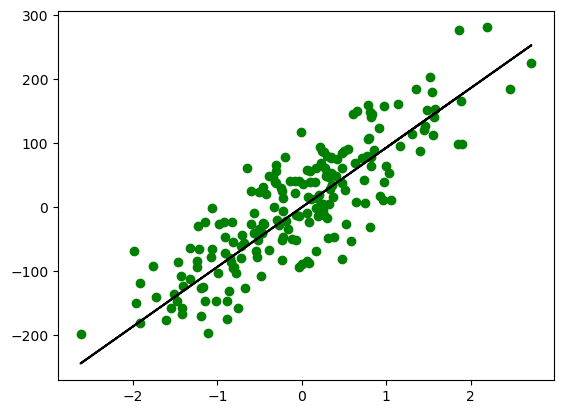

In [18]:
y_pred = (X * w).sum(axis=1)

plt.plot(X, y, 'go', X, y_pred, 'k')

# Scikit Learn: Linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression

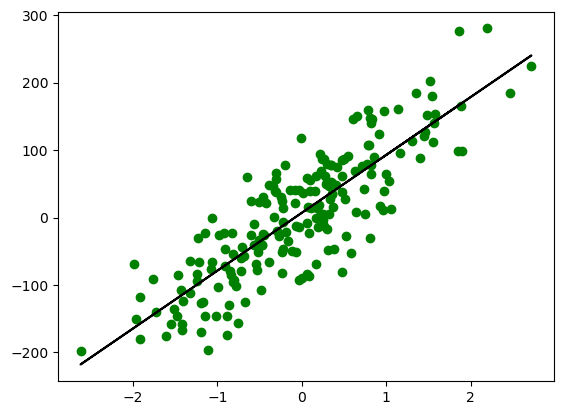

In [21]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.plot(X, y, 'go', X, y_pred, 'k')

<br>
<br>

## Linear Regression Coefficients

In [23]:
f"SK-Learn model: y = {model.coef_[0]} * x + {model.intercept_}"

'SK-Learn model: y = 85.8828705568523 * x + 7.142569505105948'

In [24]:
f"Implemented model: y = {w[1]} * x + {w[0]}"

'Implemented model: y = 85.88287055685231 * x + 7.142569505105939'

# Non-Linear Transform

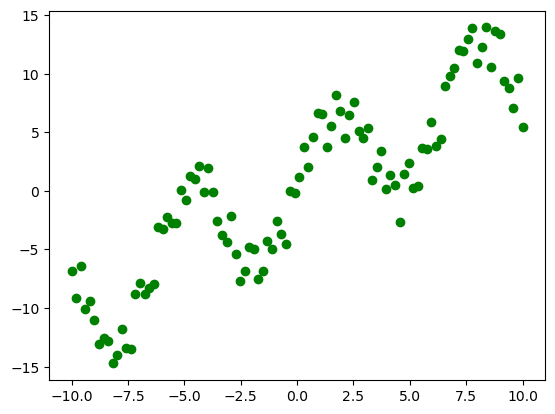

In [26]:
X = np.linspace(-10, 10, 100).reshape((100, 1))
y = 5 * np.sin(X) + X + 5 * (np.random.rand(100, 1) - 0.5)

plt.plot(X, y, 'go')

$$ (x_1) \xrightarrow[]{\phi} (x_1, sin(x_1)) $$

In [28]:
X_sin = np.concatenate(
    (
        X,
        np.sin(X)
    ),
    axis = 1
)
X_sin[:10]

array([[-10.        ,   0.54402111],
       [ -9.7979798 ,   0.36459873],
       [ -9.5959596 ,   0.17034683],
       [ -9.39393939,  -0.03083368],
       [ -9.19191919,  -0.23076008],
       [ -8.98989899,  -0.42130064],
       [ -8.78787879,  -0.59470541],
       [ -8.58585859,  -0.74392141],
       [ -8.38383838,  -0.86287948],
       [ -8.18181818,  -0.94674118]])

In [29]:
X_artificial_coordinate = np.concatenate(
    (
        np.ones((X_sin.shape[0], 1)),
        X_sin
    ),
    axis = 1
)
X_artificial_coordinate[:10]

array([[  1.        , -10.        ,   0.54402111],
       [  1.        ,  -9.7979798 ,   0.36459873],
       [  1.        ,  -9.5959596 ,   0.17034683],
       [  1.        ,  -9.39393939,  -0.03083368],
       [  1.        ,  -9.19191919,  -0.23076008],
       [  1.        ,  -8.98989899,  -0.42130064],
       [  1.        ,  -8.78787879,  -0.59470541],
       [  1.        ,  -8.58585859,  -0.74392141],
       [  1.        ,  -8.38383838,  -0.86287948],
       [  1.        ,  -8.18181818,  -0.94674118]])

## $ X^{\dagger} $

In [31]:
X_dagger = np.linalg.pinv(X_artificial_coordinate)

## $ w = X^{\dagger}y $

In [33]:
w = np.matmul(X_dagger, y)
w

array([[0.22557064],
       [0.99926996],
       [5.03704109]])

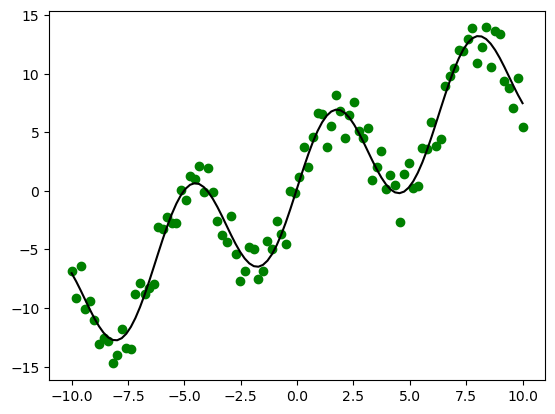

In [34]:
y_pred = np.dot(X_artificial_coordinate, w)

plt.plot(X, y, 'go', X, y_pred, 'k')